<a href="https://colab.research.google.com/github/AKookani/Knowledge_Graph/blob/main/Learning_Path_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyvis networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.9 MB/s eta 0:00:00


In [3]:
import networkx as nx
from pyvis.network import Network
import sqlite3
import json
from typing import Dict, List, Tuple
from collections import defaultdict
import matplotlib.pyplot as plt
import os

In [4]:
def creat_topic_dictionaries():
  """Create dictionaries containing topic information for different domains"""
  # Core Python topics
  python_topics = {
        'python_basics': {
            'difficulty': 'beginner',
            'keywords': ['programming', 'syntax', 'basics'],
            'domain': 'programming',
            'description': 'Basic Python programming concepts'
        },
        'data_types_variables': {
            'difficulty': 'beginner',
            'keywords': ['variables', 'types', 'basics'],
            'domain': 'programming',
            'description': 'Python data types and variables'
        },
        'control_flow': {
            'difficulty': 'beginner',
            'keywords': ['loops', 'conditionals', 'basics'],
            'domain': 'programming',
            'description': 'Control flow in Python'
        },
        'functions_basics': {
            'difficulty': 'beginner',
            'keywords': ['functions', 'methods', 'basics'],
            'domain': 'programming',
            'description': 'Python functions fundamentals'
        },
        'data_structures': {
            'difficulty': 'intermediate',
            'keywords': ['lists', 'dictionaries', 'arrays'],
            'domain': 'programming',
            'description': 'Python data structures'
        },
        'file_handling': {
            'difficulty': 'intermediate',
            'keywords': ['files', 'io', 'data'],
            'domain': 'programming',
            'description': 'File handling in Python'
        },
        'error_handling': {
            'difficulty': 'intermediate',
            'keywords': ['exceptions', 'errors', 'debugging'],
            'domain': 'programming',
            'description': 'Error handling and debugging'
        },
        'oop_basics': {
            'difficulty': 'intermediate',
            'keywords': ['classes', 'objects'],
            'domain': 'programming',
            'description': 'Object-oriented programming basics'
        },
        'advanced_oop': {
            'difficulty': 'advanced',
            'keywords': ['inheritance', 'polymorphism'],
            'domain': 'programming',
            'description': 'Advanced OOP concepts'
        }
  }

  # Finance path topics
  finance_topics = {
        'economics_101': {
            'difficulty': 'beginner',
            'keywords': ['economics', 'markets', 'basics'],
            'domain': 'finance',
            'description': 'Basic economic concepts'
        },
        'stock_market_basics': {
            'difficulty': 'beginner',
            'keywords': ['stocks', 'trading', 'markets'],
            'domain': 'finance',
            'description': 'Stock market fundamentals'
        },
        'financial_statements': {
            'difficulty': 'intermediate',
            'keywords': ['accounting', 'finance', 'analysis'],
            'domain': 'finance',
            'description': 'Understanding financial statements'
        },
        'technical_analysis': {
            'difficulty': 'intermediate',
            'keywords': ['charts', 'patterns', 'indicators'],
            'domain': 'finance',
            'description': 'Technical analysis basics'
        },
        'financial_analysis_basics': {
            'difficulty': 'intermediate',
            'keywords': ['analysis', 'metrics', 'finance'],
            'domain': 'finance',
            'description': 'Basic financial analysis'
        },
        'python_finance': {
            'difficulty': 'intermediate',
            'keywords': ['python', 'finance', 'analysis'],
            'domain': 'finance',
            'description': 'Python for financial analysis'
        },
        'algorithmic_trading': {
            'difficulty': 'advanced',
            'keywords': ['algorithms', 'trading', 'finance'],
            'domain': 'finance',
            'description': 'Algorithmic trading with Python'
        }
    }

  # Bioimage analysis path topics
  bioimage_topics = {
        'cell_biology_basics': {
            'difficulty': 'beginner',
            'keywords': ['biology', 'cells', 'basics'],
            'domain': 'biology',
            'description': 'Basic cell biology'
        },
        'microscopy_basics': {
            'difficulty': 'beginner',
            'keywords': ['microscopy', 'imaging', 'basics'],
            'domain': 'biology',
            'description': 'Basic microscopy concepts'
        },
        'image_formats': {
            'difficulty': 'beginner',
            'keywords': ['images', 'formats', 'data'],
            'domain': 'biology',
            'description': 'Understanding image formats and metadata'
        },
        'image_analysis_basics': {
            'difficulty': 'intermediate',
            'keywords': ['image analysis', 'processing'],
            'domain': 'biology',
            'description': 'Basic image analysis'
        },
        'image_processing': {
            'difficulty': 'intermediate',
            'keywords': ['processing', 'filters', 'analysis'],
            'domain': 'biology',
            'description': 'Image processing techniques'
        },
        'python_imaging': {
            'difficulty': 'intermediate',
            'keywords': ['python', 'imaging', 'analysis'],
            'domain': 'biology',
            'description': 'Python for image analysis'
        },
        'advanced_bioimage': {
            'difficulty': 'advanced',
            'keywords': ['bioimage', 'advanced', 'analysis'],
            'domain': 'biology',
            'description': 'Advanced bioimage analysis'
        }
    }

  return python_topics, finance_topics, bioimage_topics

def define_relationships():
    """Define relationships between topics with weights"""
    return [
        # Python core path
        ('python_basics', 'data_types_variables', 1.0),
        ('data_types_variables', 'control_flow', 1.0),
        ('control_flow', 'functions_basics', 1.0),
        ('functions_basics', 'data_structures', 0.9),
        ('data_structures', 'file_handling', 0.8),
        ('data_structures', 'error_handling', 0.8),
        ('data_structures', 'oop_basics', 0.8),
        ('oop_basics', 'advanced_oop', 0.7),

        # Finance path
        ('economics_101', 'stock_market_basics', 1.0),
        ('stock_market_basics', 'financial_statements', 0.9),
        ('financial_statements', 'financial_analysis_basics', 0.9),
        ('stock_market_basics', 'technical_analysis', 0.8),
        ('python_basics', 'python_finance', 0.7),
        ('financial_analysis_basics', 'python_finance', 0.8),
        ('data_structures', 'python_finance', 0.7),
        ('technical_analysis', 'python_finance', 0.7),
        ('python_finance', 'algorithmic_trading', 0.6),

        # Bioimage path
        ('cell_biology_basics', 'microscopy_basics', 1.0),
        ('microscopy_basics', 'image_formats', 0.9),
        ('image_formats', 'image_analysis_basics', 0.9),
        ('image_analysis_basics', 'image_processing', 0.8),
        ('python_basics', 'python_imaging', 0.7),
        ('image_processing', 'python_imaging', 0.8),
        ('data_structures', 'python_imaging', 0.7),
        ('python_imaging', 'advanced_bioimage', 0.6)
    ]

In [5]:
def build_graph():
  """Build the knowledge graph with topics and relationships"""
  graph = nx.DiGraph()

  # Get the dictionaries for the topics we defined earlier
  python_topics, finance_topics, bioimage_topics = creat_topic_dictionaries()

  # Combine all topics and unwrap topic and metadata
  all_topics = {**python_topics, **finance_topics, **bioimage_topics}

  # Add nodes for topic_id and assign metadata key-value pairs as attributes of the node.
  for topic_id, metadata in all_topics.items():
      graph.add_node(topic_id, **metadata)

  # Add relationships (edges)
  relationships = define_relationships()
  for from_topic, to_topic, weight in relationships:
    graph.add_edge(from_topic, to_topic, weight=weight, type='prerequisite')

  return graph, all_topics

# Build the graph
graph, topic_metadata = build_graph()

In [6]:
def visualize_graph_pyvis(graph: nx.DiGraph, topic_metadata: Dict, output_file='learning_paths.html'):
  """Create interactive knowledge graph using pyvis"""
  net = Network(notebook=True, height="750px", width="100%", bgcolor="#ffffff", directed=True)

  # Color map for different domains
  color_map = {
      'programming': '#add8e6', # light blue
      'finance': '#90EE90',     # light green
      'biology': '#FA8072'      # salmon
  }

  # Add nodes
  for node in graph.nodes():
    metadata = graph.nodes[node]
    net.add_node(
        node,
        label=node.replace('_', ' ').title(),
        title=f"Domain: {metadata['domain']}\n"
              f"Difficulty: {metadata['difficulty']}\n"
              f"Description: {metadata['description']}",
        color=color_map[metadata['domain']]
    )

  # Add edges
  for edge in graph.edges(data=True):
    net.add_edge(edge[0], edge[1], title=f"Weight: {edge[2]['weight']}")

  try:
    net.show(output_file)
    print(f"Graph visualization save to {output_file}")
  except Exception as e:
    print(f"Error in visualization: {e}")
    visulaize_graph_matplotlib(graph)

def visulaize_graph_matplotlib(graph: nx.DiGraph):
  """Create static visualization using matplotlib"""
  plt.figure(figsize=(15, 10))
  pos = nx.spring_layout(graph, k=1, iterations=50)

  # Color nodes based on domain
  colors = []
  for node in graph.nodes():
    domain = graph.nodes[node]['domain']
    if domain == 'programming':
      colors.append('lightblue')
    elif domain == 'finance':
      colors.append('lightgreen')
    else:
      colors.append('salmon')

  nx.draw(graph, pos,
          node_color=colors,
          with_labels=True,
          node_size=2000,
          font_size=8,
          font_weight='bold',
          arrows=True,
          edge_color='gray',
          arrowsize=20)

  plt.title("Learning Paths Graph")
  plt.show()

learning_paths.html
Graph visualization save to learning_paths.html


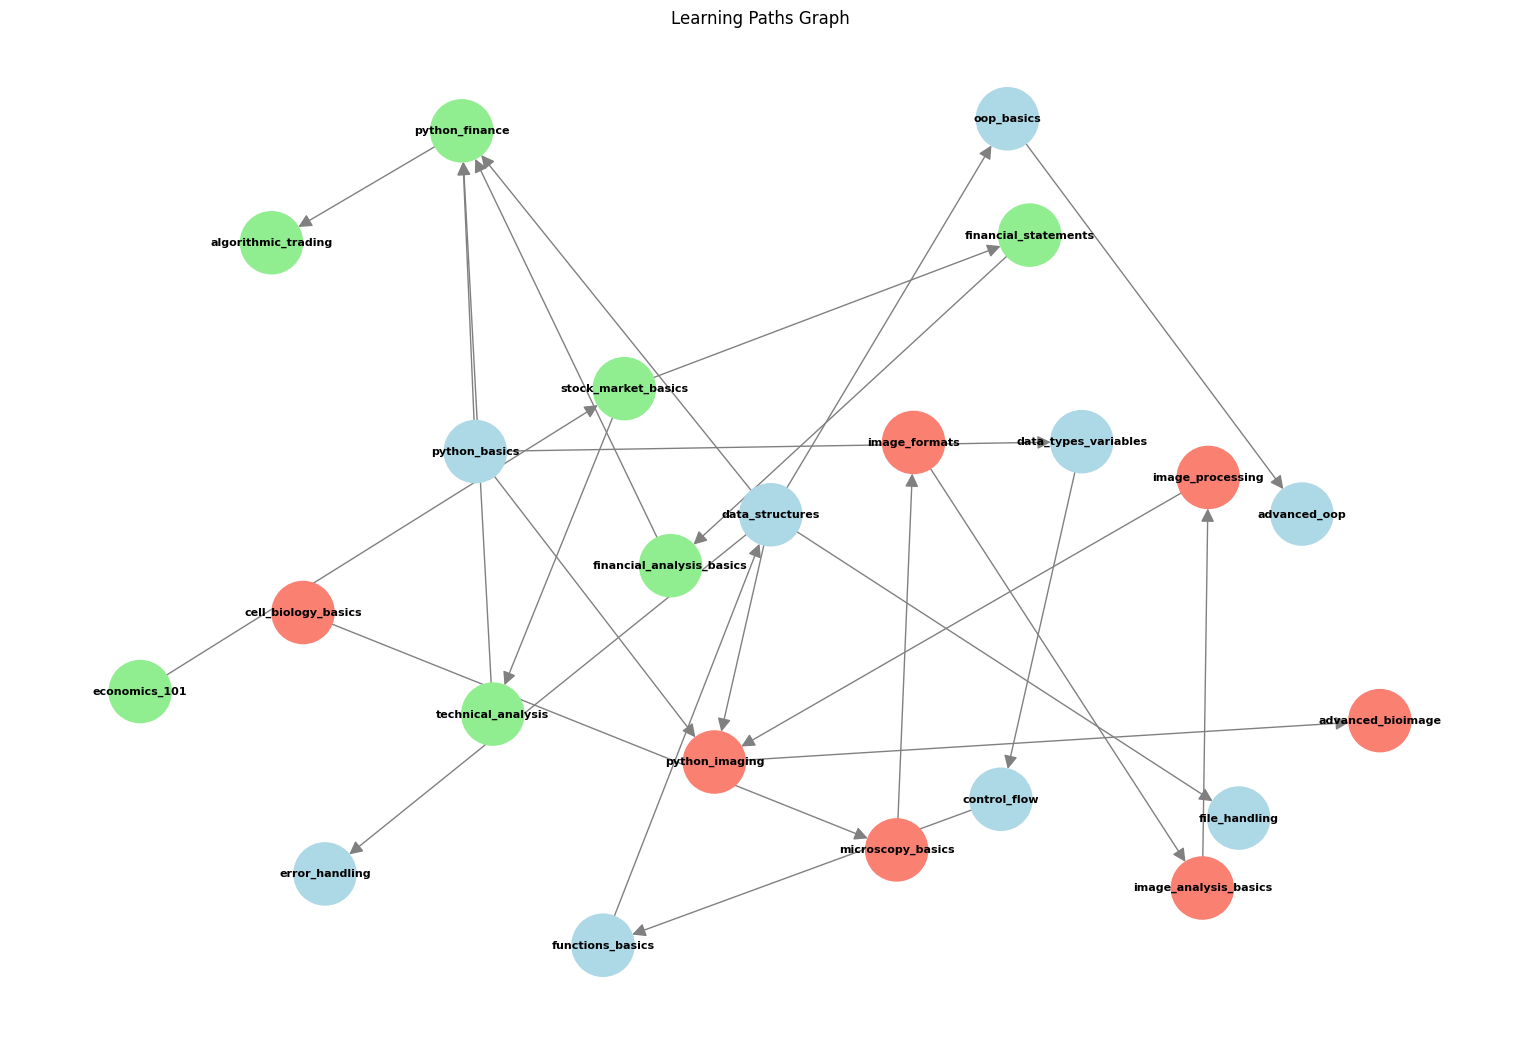

In [7]:
# Create visualizations
visualize_graph_pyvis(graph, topic_metadata)
visulaize_graph_matplotlib(graph)

In [8]:
def basic_analysis(graph: nx.DiGraph):
  """Basic graph analysis on the graph and display results."""
  # Calculate and display PageRank
  pagerank = nx.pagerank(graph)
  print("\nPageRank of nodes (indicating topic importance):")
  for node, centrality in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {centrality:.4f}")

  # Calculate degree centrality
  in_degree = nx.betweenness_centrality(graph)
  print("\nBetweenness cetrality (bridge topics between domains):")
  for node, centrality in sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality:.4f}")

  # Calculate betweenness centrality
  betweenness = nx.betweenness_centrality(graph)
  print("\nBetweenness centrality (bridge topics between domains):")
  for node, centrality in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality:.4f}")

In [9]:
# Run basic analysis
print("Running basic graph analysis...")
basic_analysis(graph)

Running basic graph analysis...

PageRank of nodes (indicating topic importance):
algorithmic_trading: 0.0930
python_finance: 0.0899
advanced_bioimage: 0.0860
python_imaging: 0.0817
image_processing: 0.0614
data_structures: 0.0563
image_analysis_basics: 0.0527
functions_basics: 0.0468
image_formats: 0.0426
financial_analysis_basics: 0.0423
advanced_oop: 0.0392
control_flow: 0.0356
stock_market_basics: 0.0306
microscopy_basics: 0.0306
financial_statements: 0.0303
technical_analysis: 0.0288
file_handling: 0.0266
error_handling: 0.0266
oop_basics: 0.0266
data_types_variables: 0.0224
python_basics: 0.0166
economics_101: 0.0166
cell_biology_basics: 0.0166

Betweenness cetrality (bridge topics between domains):
data_structures: 0.0606
functions_basics: 0.0498
control_flow: 0.0346
python_finance: 0.0216
python_imaging: 0.0216

Betweenness centrality (bridge topics between domains):
data_structures: 0.0606
functions_basics: 0.0498
control_flow: 0.0346
python_finance: 0.0216
python_imaging: 0.0

In [12]:
def get_prerequisites(graph: nx.DiGraph, topic: str, max_depth=3):
  """
  Find prerequisites for a given topic up to a specified depth.

  Args:
    graph: NetworkX directed graph
    topic: Target topic to find prerequisites for
    max_depth: Maximum depth to search for prerequisites

  Returns:
    Dict of prerequisite with their minimum distance from the target topic.
  """
  if topic not in graph.nodes():
    print(f"Error: Topic '{topic}' not found in the graph.")
    return{}

  prerequisites = {}
  current_depth = 1
  current_nodes = {topic}
  visited = set()

  while current_depth <= max_depth and current_nodes:
    next_nodes = set()

    for node in current_nodes:
      # Get immediate predecessors (prerequisites)
      for pred in graph.predecessors(node):
        if pred not in visited and pred not in prerequisites:
          prerequisites[pred] = current_depth
          next_nodes.add(pred)
      visited.add(node)
    current_nodes = next_nodes
    current_depth += 1

  return prerequisites

def print_prerequisites(graph: nx.DiGraph, topic: str):
  """Print prerequisites for a given topic"""
  print(f"\nPrerequisite analysis for: {topic}")
  print("-" * 50)

  prereqs = get_prerequisites(graph, topic)
  if not prereqs:
    return

  # Group prerequisites by depth
  depth_groups = defaultdict(list)
  for topic, depth in prereqs.items():
    depth_groups[depth].append(topic)

  # Print prerequistes by level
  for depth in sorted(depth_groups.keys()):
    print(f"\nLevel {depth} prerequisites:")
    for prereq in depth_groups[depth]:
      metadata = graph.nodes[prereq]
      print(f"- {prereq.replace('_', ' ').title()}:")
      print(f" Difficulty: {metadata['difficulty']}")
      print(f" Description: {metadata['description']}")

In [13]:
# Example prerequisite analysis
print("\nAnalyzing prerequisites...")
print_prerequisites(graph, 'algorithmic_trading')


Analyzing prerequisites...

Prerequisite analysis for: algorithmic_trading
--------------------------------------------------

Level 1 prerequisites:
- Python Finance:
 Difficulty: intermediate
 Description: Python for financial analysis

Level 2 prerequisites:
- Python Basics:
 Difficulty: beginner
 Description: Basic Python programming concepts
- Financial Analysis Basics:
 Difficulty: intermediate
 Description: Basic financial analysis
- Data Structures:
 Difficulty: intermediate
 Description: Python data structures
- Technical Analysis:
 Difficulty: intermediate
 Description: Technical analysis basics

Level 3 prerequisites:
- Stock Market Basics:
 Difficulty: beginner
 Description: Stock market fundamentals
- Functions Basics:
 Difficulty: beginner
 Description: Python functions fundamentals
- Financial Statements:
 Difficulty: intermediate
 Description: Understanding financial statements


In [16]:
def recommend_learning_path(graph: nx.DiGraph, domain: str):
    """
    Recommend a learning path for a specific domain (finance or bioimage).

    Args:
        graph: NetworkX directed graph
        domain: Target domain ('finance' or 'bioimage')
    """
    if domain not in ['finance', 'bioimage']:
        print("Error: Domain must be either 'finance' or 'bioimage'")
        return

    print(f"\nRecommended Learning Path for Python in {domain.title()}")
    print("-" * 50)

    # Define target nodes based on domain
    if domain == 'finance':
        target_node = 'algorithmic_trading'
        domain_identifier = 'finance'
    else:
        target_node = 'advanced_bioimage'
        domain_identifier = 'biology'

    # Find all shortest paths from python_basics to target node
    try:
        paths = nx.all_shortest_paths(graph, 'python_basics', target_node, weight='weight')
        paths = list(paths)  # Convert generator to list
    except nx.NetworkXNoPath:
        print(f"No path found from Python basics to advanced {domain} topics")
        return

    # Get the optimal path (you might want to consider weights or other factors)
    optimal_path = paths[0]  # Taking the first shortest path

    print("Recommended learning sequence:")
    for i, topic in enumerate(optimal_path, 1):
        metadata = graph.nodes[topic]
        print(f"\n{i}. {topic.replace('_', ' ').title()}:")
        print(f"   Difficulty: {metadata['difficulty']}")
        print(f"   Description: {metadata['description']}")

        # Print estimated complexity and prerequisites
        if i < len(optimal_path):
            edge_data = graph.get_edge_data(topic, optimal_path[i])
            if edge_data and 'weight' in edge_data:
                print(f"   Transition Difficulty: {(1 - edge_data['weight']) * 100:.1f}%")

    # Additional recommendations
    print("\nSupplementary topics you might find useful:")
    for node, metadata in graph.nodes(data=True):
        if (metadata['domain'] == domain_identifier and
            node not in optimal_path and
            metadata['difficulty'] != 'advanced'):
            print(f"- {node.replace('_', ' ').title()} ({metadata['difficulty']})")

In [17]:
# Example learning path recommendations
print("\nGenerating learning path recommendations...")
recommend_learning_path(graph, 'finance')
recommend_learning_path(graph, 'bioimage')


Generating learning path recommendations...

Recommended Learning Path for Python in Finance
--------------------------------------------------
Recommended learning sequence:

1. Python Basics:
   Difficulty: beginner
   Description: Basic Python programming concepts
   Transition Difficulty: 30.0%

2. Python Finance:
   Difficulty: intermediate
   Description: Python for financial analysis
   Transition Difficulty: 40.0%

3. Algorithmic Trading:
   Difficulty: advanced
   Description: Algorithmic trading with Python

Supplementary topics you might find useful:
- Economics 101 (beginner)
- Stock Market Basics (beginner)
- Financial Statements (intermediate)
- Technical Analysis (intermediate)
- Financial Analysis Basics (intermediate)

Recommended Learning Path for Python in Bioimage
--------------------------------------------------
Recommended learning sequence:

1. Python Basics:
   Difficulty: beginner
   Description: Basic Python programming concepts
   Transition Difficulty: 30.